# Lending Club Case Study - Sreekumar N.P.

Problem Statement :
Lending Club requires me to analyze all patterns and dependencies of the Loan defaulters and provide them with recommendations to identify such applicants.

In [1]:
#import the libraries
import pandas as pd,numpy as np
import warnings
warnings.filterwarnings("ignore")
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Understanding

In [2]:
#read the dataset and check the first five rows
df1=pd.read_csv("loan.csv")
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Check the shape of the dataframe
df1.shape


(39717, 111)

In [4]:
#Check the information related to the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
#Check statistical information of the dataframe
df1.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# Inference from the data above : Seems there is large amount of valid data, hence requires detailed checks for data cleaning

In [6]:
##Check the datatypes of all the columns of the dataframe
df1.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [7]:
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# Seems there are few columns which only contains null values in its rows e.g. 39717 rows having null values out of Total rows = 39717. Take action to delete those Columns which only contains null values in its rows.

In [8]:
#Find columns having null values
df1.isnull().all().sum()

54

In [9]:
#Find columns with all null values and display it before making a decision to drop them
df1_null=df1.loc[:,df1.isnull().all()]
df1_null.dtypes

mths_since_last_major_derog       float64
annual_inc_joint                  float64
dti_joint                         float64
verification_status_joint         float64
tot_coll_amt                      float64
tot_cur_bal                       float64
open_acc_6m                       float64
open_il_6m                        float64
open_il_12m                       float64
open_il_24m                       float64
mths_since_rcnt_il                float64
total_bal_il                      float64
il_util                           float64
open_rv_12m                       float64
open_rv_24m                       float64
max_bal_bc                        float64
all_util                          float64
total_rev_hi_lim                  float64
inq_fi                            float64
total_cu_tl                       float64
inq_last_12m                      float64
acc_open_past_24mths              float64
avg_cur_bal                       float64
bc_open_to_buy                    

In [10]:
#dropping columns with all null
df1=df1.dropna(axis=1,how='all')

In [11]:
#Check if the Coulmns with all null values in their rows are deleted.
df1.isnull().all().sum()


0

In [12]:
#Find rows having null values
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

 # Inference from the data above : There seems to be some more columns with more Null data in their rows.Note1 : mths_since_last_record ,next_pymnt_d has more than 90% of Null data, better to remove them.Note2:mths_since_last_delinq seems interesting from domain knowledge gained, that it conveys positive prospects until that month , but could be potential defaulters afterwards. I feel not to delete them and analyze in detail if required.

In [13]:
#Delete Columns : mths_since_last_record ,mths_since_last_delinq
df1 = df1.drop(columns = ['mths_since_last_record' ,'next_pymnt_d'])

In [14]:
#Find rows having null values
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [15]:
#Analyze the Tatget variable : loan_status to identify any irrelevant rows
df1.loan_status.isnull().sum()


0

In [16]:
df1.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [17]:
#Find the data type of columns
df1.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [18]:
#important
#As anaysis is on finding the factors that contribute for chargeoff, details related to 'Current' are irrelevant.
#So dropping them
df1 = df1.drop(df1[df1.loan_status == 'Current'].index)
df1.shape

(38577, 55)

In [19]:
# interst rate dtype needs to be converted to a quantitative value for easy analysis.
df1.int_rate=df1.int_rate.str.replace('%','')
df1.int_rate.value_counts()
df1.int_rate=df1.int_rate.astype("float")
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [20]:
#Check and ensure that int_rate is changed to float64
df1.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [21]:
df1.dti.isnull().sum()

0

In [22]:
df1.emp_length.isnull().sum()

1033

In [23]:
df1.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [24]:
df1.emp_length.fillna(0,inplace = True)
df1.emp_length.isnull().sum()

0

# Note : At the beginning it was (39717, 111). After data cleaning of missing values and redundant columns, The remaining rows are 38577 and columns are 55.

# Data Cleaning phase is complete

# Start to perform Data Analysis

# From further investigation to gain domain experience the important variables identified are: 
1. Annual Income 
2. Loan Amount
3. Term
4. Grade
5. SubGrade
6. Loan Amount
7. Purpose of loan
8. DTI
9. Emp_length
10. Loan Date
11. Hpme Ownership
12. Verification_Status

There are customer behavioral variables present in the dataset, but that won't be available at the time of loan application hence can be ignored.


In [25]:
df1.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

# Quantitative Variables - Univariate Analysis

In [26]:
df1.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:>

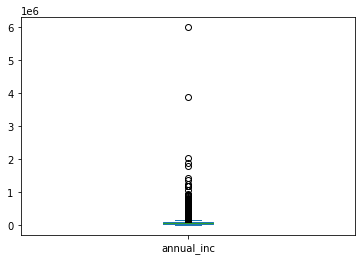

In [27]:
df1.annual_inc.plot.box()

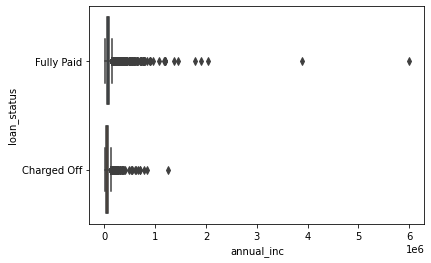

In [28]:
sns.boxplot(df1.annual_inc,df1.loan_status)
plt.show()

In [29]:
df1 = df1[df1.annual_inc < 1000000]

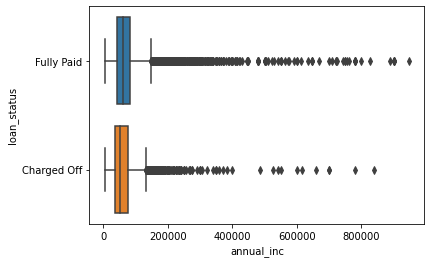

In [30]:
sns.boxplot(df1.annual_inc,df1.loan_status)
plt.show()

In [31]:
df2 = df1[(df1.annual_inc <10000000) & (df1.loan_status == 'Charged Off')]
df2.head()
df2.describe()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,5.626000e+03,5.626000e+03,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,...,5626.000000,5626.000000,5626.000000,5620.0,5626.0,5626.0,5620.0,5626.0,5508.000000,5625.0
mean,6.978205e+05,8.677217e+05,12103.732670,11752.683967,10863.652949,13.820579,336.170976,62216.211525,13.999236,0.170636,...,672.217754,87.580860,326.014998,0.0,1.0,0.0,0.0,0.0,0.067175,0.0
std,2.163887e+05,2.723416e+05,8086.302606,7761.020860,7662.154617,3.654721,217.070923,45079.747234,6.585339,0.535029,...,1720.873939,386.623347,529.029889,0.0,0.0,0.0,0.0,0.0,0.251794,0.0
min,6.141900e+04,8.035300e+04,900.000000,900.000000,0.000000,5.420000,22.790000,4080.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.297122e+05,6.848970e+05,5600.000000,5562.500000,5000.000000,11.295000,168.522500,37000.000000,9.050000,0.000000,...,0.000000,0.000000,112.827500,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.969170e+05,8.881330e+05,10000.000000,10000.000000,9400.605813,13.610000,293.870000,53000.000000,14.290000,0.000000,...,173.050000,2.511600,238.200000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.548820e+05,1.066599e+06,16500.000000,16000.000000,15000.000000,16.400000,457.925000,75000.000000,19.290000,0.000000,...,595.767500,9.372500,405.887500,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,840000.000000,29.850000,8.000000,...,29623.350000,7002.190000,12818.380000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


# Inference from the data above : The charged Off maximum annual income is 840000. We can remove the outliers of annual income above it.

In [32]:
df1 = df1[df1.annual_inc <= 840000]

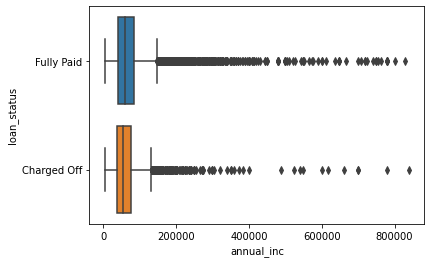

In [33]:
sns.boxplot(df1.annual_inc,df1.loan_status)
plt.show()

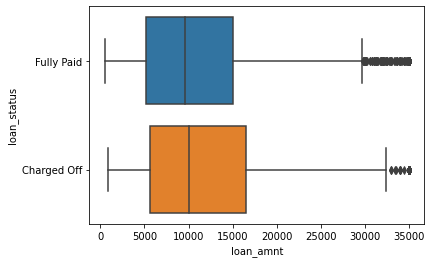

In [34]:
sns.boxplot(df1.loan_amnt,df1.loan_status)
plt.show()

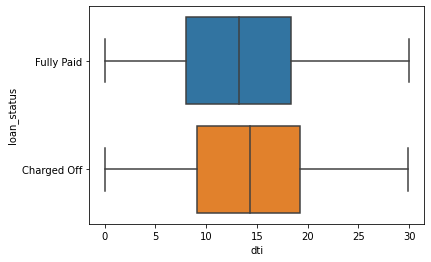

In [35]:
sns.boxplot(df1.dti,df1.loan_status)
plt.show()

# Bivariate analysis

<AxesSubplot:xlabel='loan_status'>

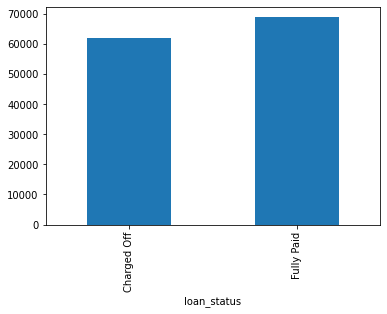

In [36]:
df1.groupby(['loan_status'])['annual_inc'].mean().plot.bar()
#dont make sense could be outliers in annual inc so mean

<AxesSubplot:xlabel='loan_status'>

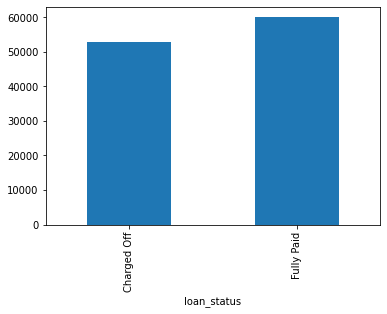

In [37]:
df1.groupby(['loan_status'])['annual_inc'].median().plot.bar()

# Inference from the data above : There is not much to infer from the mean and median bar plots, hence it would require the process of binning and further analysis

In [38]:
df1['incomeRange']=pd.qcut(df1.annual_inc,[0,0.33,0.66,1],["L","M","H"])

In [39]:
df1.incomeRange.value_counts()

M    12959
L    12806
H    12792
Name: incomeRange, dtype: int64

In [40]:
#loan_status of different incomegroup over median loan amount
#res=pd.pivot_table(data=df1,index="loan_status",columns ="incomeRange",values="loan_amnt",aggfunc=lambda x: np.quantile(x,0.5))
res=pd.pivot_table(data=df1,index="loan_status",columns ="incomeRange",values="loan_amnt",aggfunc=sum)

<AxesSubplot:xlabel='incomeRange', ylabel='loan_status'>

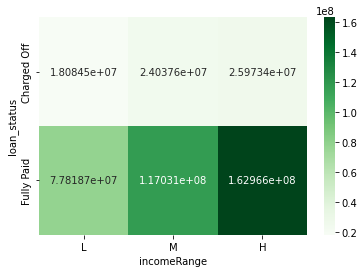

In [41]:
##Apply customisations
sns.heatmap(res,cmap="Greens",annot=True,fmt='g')

# Inference from the data above : The Total amount Charged Off is higher for medium income and higher income than the Lower income range people.


<AxesSubplot:xlabel='incomeRange', ylabel='count'>

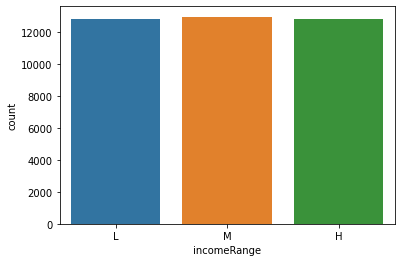

In [42]:
#loan_status of different incomegroup over median loan amount
dfAnPurpose=df1[['purpose','incomeRange','loan_amnt']]
sns.countplot(x="incomeRange",data=dfAnPurpose)

In [43]:
#loan_status for different purpose over median loan amount
resp=pd.pivot_table(data=df1,index="purpose",columns ="loan_status",values="loan_amnt",aggfunc=lambda x: np.quantile(x,0.5))

<AxesSubplot:xlabel='loan_status', ylabel='purpose'>

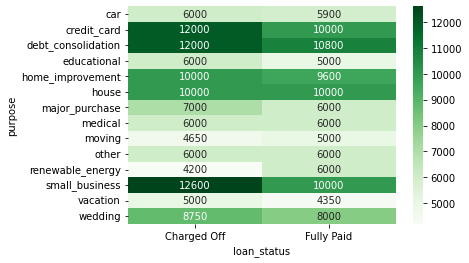

In [44]:
sns.heatmap(resp,cmap="Greens",annot=True,fmt='g')

In [45]:
#important
# The loan_amount taken for creditcard,debt_consolidation,small_business are among the top defaulted ones


In [46]:
resa=pd.pivot_table(data=df1,index="purpose",columns ="incomeRange",values="loan_amnt",aggfunc=lambda x: np.quantile(x,0.5))

<AxesSubplot:xlabel='incomeRange', ylabel='purpose'>

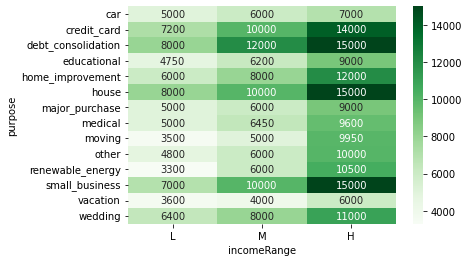

In [47]:
sns.heatmap(resa,cmap="Greens",annot=True,fmt='g')

In [48]:
dfannual=df1[['purpose','incomeRange']]
resannual=pd.pivot_table(data=dfannual,index="purpose",columns ="incomeRange",aggfunc=len)
resannual.head()


incomeRange,L,M,H
purpose,,,
car,561,507,431
credit_card,1485,1730,1811
debt_consolidation,5961,6340,5745
educational,181,73,71
home_improvement,630,844,1398


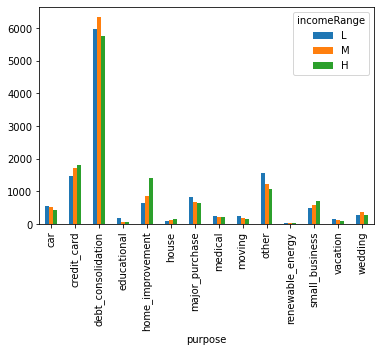

In [49]:
resannual.plot(kind="bar")
plt.show()

In [50]:
#important
#Moderate income group applies more loan mostly for debt_consolidation

In [51]:
dfannualdefault=df1[['purpose','incomeRange','loan_status']]
dfannualdefault=dfannualdefault[dfannualdefault['loan_status']=='Charged Off']
dfannualdefault.head()
resannualdef=pd.pivot_table(data=dfannualdefault,index=["purpose","loan_status"],columns ="incomeRange",aggfunc=len)
resannualdef.head()

,incomeRange,L,M,H
purpose,loan_status,,,
car,Charged Off,75,49,36
credit_card,Charged Off,202,178,162
debt_consolidation,Charged Off,1058,990,718
educational,Charged Off,35,10,11
home_improvement,Charged Off,98,120,129


In [52]:
resannualdef['sum']=resannualdef['L']+resannualdef['M']+resannualdef['H']
resannualdef['lper']=(resannualdef['L']/resannualdef['sum'])*100
resannualdef['mper']=(resannualdef['M']/resannualdef['sum'])*100
resannualdef['hper']=(resannualdef['H']/resannualdef['sum'])*100
resannualdef.head()


,incomeRange,L,M,H,sum,lper,mper,hper
purpose,loan_status,,,,,,,
car,Charged Off,75,49,36,160,46.875000,30.625000,22.500000
credit_card,Charged Off,202,178,162,542,37.269373,32.841328,29.889299
debt_consolidation,Charged Off,1058,990,718,2766,38.250181,35.791757,25.958062
educational,Charged Off,35,10,11,56,62.500000,17.857143,19.642857
home_improvement,Charged Off,98,120,129,347,28.242075,34.582133,37.175793


In [53]:
resannualdef.tail()

,incomeRange,L,M,H,sum,lper,mper,hper
purpose,loan_status,,,,,,,
other,Charged Off,305,182,146,633,48.183254,28.751975,23.064771
renewable_energy,Charged Off,11,2,6,19,57.894737,10.526316,31.578947
small_business,Charged Off,143,182,150,475,30.105263,38.315789,31.578947
vacation,Charged Off,25,19,9,53,47.169811,35.849057,16.981132
wedding,Charged Off,35,34,27,96,36.458333,35.416667,28.125000


<AxesSubplot:xlabel='purpose,loan_status'>

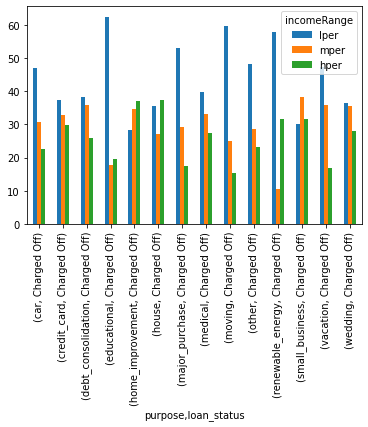

In [54]:
resannualdefper=resannualdef[['lper','mper','hper']]
resannualdefper.plot(kind="bar")

In [55]:
#important
#On percentage analysis,Low income group creates more charge_offs when they apply for educational,moving,renewableenergy loans.

In [56]:
dfannualpaid=df1[['purpose','incomeRange','loan_status']]
dfannualpaid=dfannualpaid[dfannualpaid['loan_status']=='Fully Paid']
dfannualpaid.head()
resannualpaid=pd.pivot_table(data=dfannualpaid,index=["purpose","loan_status"],columns ="incomeRange",aggfunc=len)
resannualpaid.head()

,incomeRange,L,M,H
purpose,loan_status,,,
car,Fully Paid,486,458,395
credit_card,Fully Paid,1283,1552,1649
debt_consolidation,Fully Paid,4903,5350,5027
educational,Fully Paid,146,63,60
home_improvement,Fully Paid,532,724,1269


In [57]:
resannualpaid['sum']=resannualpaid['L']+resannualpaid['M']+resannualpaid['H']
resannualpaid['lper']=(resannualpaid['L']/resannualpaid['sum'])*100
resannualpaid['mper']=(resannualpaid['M']/resannualpaid['sum'])*100
resannualpaid['hper']=(resannualpaid['H']/resannualpaid['sum'])*100
resannualpaid.head()

,incomeRange,L,M,H,sum,lper,mper,hper
purpose,loan_status,,,,,,,
car,Fully Paid,486,458,395,1339,36.295743,34.204630,29.499627
credit_card,Fully Paid,1283,1552,1649,4484,28.612846,34.611954,36.775201
debt_consolidation,Fully Paid,4903,5350,5027,15280,32.087696,35.013089,32.899215
educational,Fully Paid,146,63,60,269,54.275093,23.420074,22.304833
home_improvement,Fully Paid,532,724,1269,2525,21.069307,28.673267,50.257426


<AxesSubplot:xlabel='purpose,loan_status'>

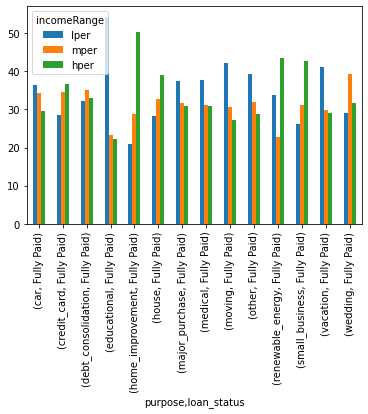

In [58]:
resannualpaidper=resannualpaid[['lper','mper','hper']]
resannualpaidper.plot(kind="bar")

In [59]:
#important
#Medium income group fully pays debtconsolidation loans.But Low income makes chargeoffs
#Low income group is highest in paying educational loans fully but they are also high in making chargedoffs in the same category

<AxesSubplot:xlabel='purpose,loan_status'>

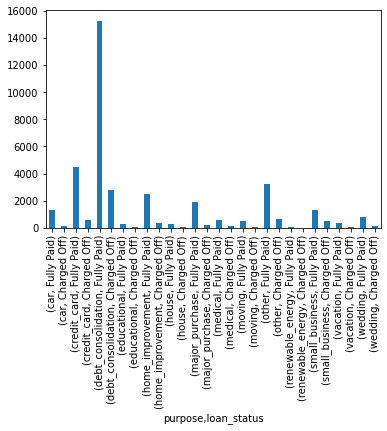

In [60]:
df1.groupby(['purpose'])['loan_status'].value_counts().plot.bar()
#The largest number of loan is taken for debt_consolidation

In [61]:
df1.dtypes

id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [62]:
dfdelinq=df1[['id','loan_amnt','loan_status','delinq_2yrs','mths_since_last_delinq','acc_now_delinq','chargeoff_within_12_mths','incomeRange','delinq_amnt','grade']]
dfdelinq.head()

,id,loan_amnt,loan_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,chargeoff_within_12_mths,incomeRange,delinq_amnt,grade
0,1077501,5000,Fully Paid,0,NaN,0,0.0,L,0,B
1,1077430,2500,Charged Off,0,NaN,0,0.0,L,0,C
2,1077175,2400,Fully Paid,0,NaN,0,0.0,L,0,C
3,1076863,10000,Fully Paid,0,35.0,0,0.0,M,0,C
5,1075269,5000,Fully Paid,0,NaN,0,0.0,L,0,A


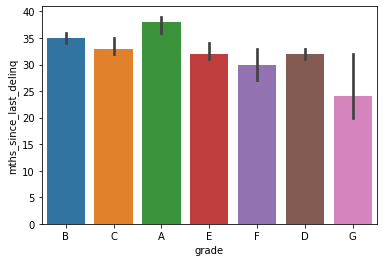

In [63]:
sns.barplot(data=dfdelinq,x='grade',y='mths_since_last_delinq',estimator =np.median)
plt.show()

In [64]:
dfdelinq.dtypes

id                             int64
loan_amnt                      int64
loan_status                   object
delinq_2yrs                    int64
mths_since_last_delinq       float64
acc_now_delinq                 int64
chargeoff_within_12_mths     float64
incomeRange                 category
delinq_amnt                    int64
grade                         object
dtype: object

In [65]:
dfdelinq.mths_since_last_delinq.value_counts()

0.0      442
15.0     244
23.0     243
30.0     243
24.0     236
        ... 
107.0      1
85.0       1
97.0       1
95.0       1
115.0      1
Name: mths_since_last_delinq, Length: 95, dtype: int64

In [66]:
dfdelinq.delinq_2yrs.value_counts()

0     34370
1      3204
2       673
3       211
4        60
5        21
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

In [67]:
dfdelinq.acc_now_delinq.value_counts()

0    38557
Name: acc_now_delinq, dtype: int64

In [68]:
dfdelinq.mths_since_last_delinq.isnull().sum()

24895

In [69]:
dfdelinq=dfdelinq[~dfdelinq.mths_since_last_delinq.isnull()]
dfdelinq.dtypes

id                             int64
loan_amnt                      int64
loan_status                   object
delinq_2yrs                    int64
mths_since_last_delinq       float64
acc_now_delinq                 int64
chargeoff_within_12_mths     float64
incomeRange                 category
delinq_amnt                    int64
grade                         object
dtype: object

In [70]:
dfdelinq.grade.value_counts()

B    3850
C    3439
D    2523
A    1830
E    1327
F     528
G     165
Name: grade, dtype: int64

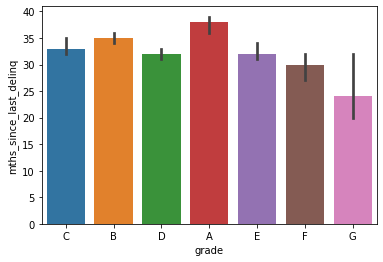

In [71]:
sns.barplot(data=dfdelinq,x='grade',y='mths_since_last_delinq',estimator =np.median)
plt.show()

In [72]:
#People in low risk A,B,C,D does not have much delinques in last months.Their mths_since_last_delinq tend to be higher

<AxesSubplot:xlabel='grade'>

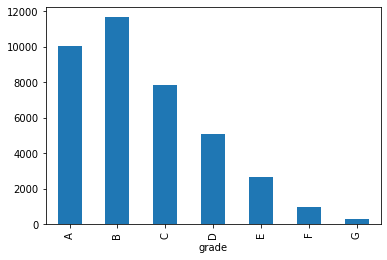

In [73]:
df1.groupby(['grade'])['loan_status'].count().plot.bar()

In [74]:
dfrisk=df1[['grade','loan_status']]
resrisk=pd.pivot_table(data=dfrisk,index="grade",columns ="loan_status",aggfunc=len)


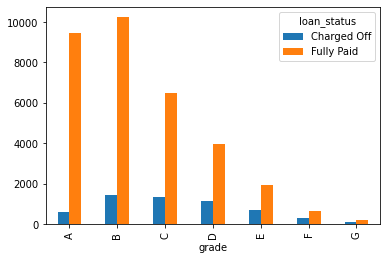

In [75]:
resrisk.plot(kind="bar")
plt.show()

In [76]:
#important
#Chance of getting loan of high risk group is minimal. 'A' grade loans represent the lowest risk while 'G' grade loans are the riskiest.

<AxesSubplot:xlabel='grade'>

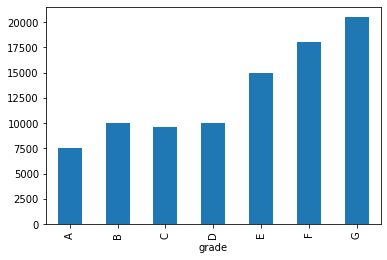

In [77]:
df1.groupby(['grade'])['loan_amnt'].median().plot.bar()

In [78]:
#importaant
#The median amount of loan taken by high risk group will be higher

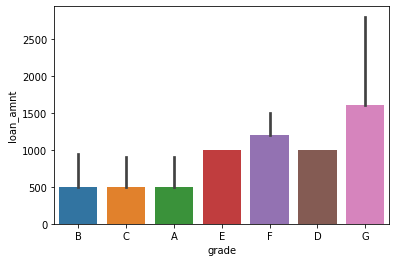

In [79]:
sns.barplot(data=df1,x='grade',y='loan_amnt',estimator =np.min)
plt.show()

In [80]:
resg=pd.pivot_table(data=df1,index="purpose",columns ="grade",values="loan_amnt",aggfunc=lambda x: np.quantile(x,0.5))

<AxesSubplot:xlabel='grade', ylabel='purpose'>

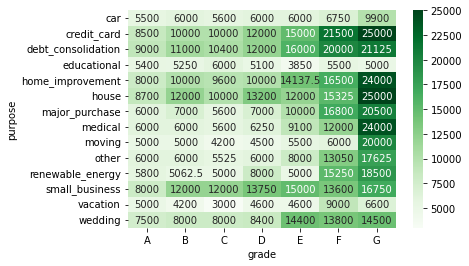

In [81]:
sns.heatmap(resg,cmap="Greens",annot=True,fmt='g')

In [82]:
#important
#High risk group needs loan more for credit_Card,medical,home_improvement purposes

In [83]:
dfriskdefault=df1[['grade','incomeRange','loan_status']]
dfriskdefault=dfriskdefault[dfriskdefault['loan_status']=='Charged Off']
dfriskdefault.head()


,grade,incomeRange,loan_status
1,C,L,Charged Off
8,F,L,Charged Off
9,B,L,Charged Off
12,C,L,Charged Off
14,B,H,Charged Off


In [84]:
resriskdft=pd.pivot_table(data=dfriskdefault,index=['grade'],columns =["loan_status",'incomeRange'],aggfunc=len)


In [85]:
resriskdft.head()

loan_status Charged Off          
incomeRange           L    M    H
grade                            
A                   303  189  110
B                   626  462  337
C                   577  454  315
D                   421  388  309
E                   210  260  245

<AxesSubplot:xlabel='grade'>

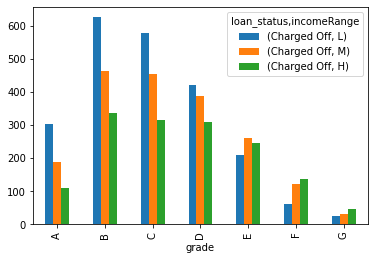

In [86]:
resriskdft.plot(kind='bar')

In [87]:
#important this shows largest number of chargeoff occured in risk group 'B'.But the truth is the number of total loans in RiskGroup B also will be higher.so we have to take percentage

In [88]:
resrisk["Total"]=resrisk["Charged Off"]++resrisk["Fully Paid"]
resrisk["perOff"]=(resrisk["Charged Off"]/resrisk["Total"])*100
resrisk.head()
plotrisk=resrisk[['perOff']]
plotrisk.head()

loan_status,perOff
grade,
A,5.997808
B,12.209751
C,17.196883
D,21.990559
E,26.849418


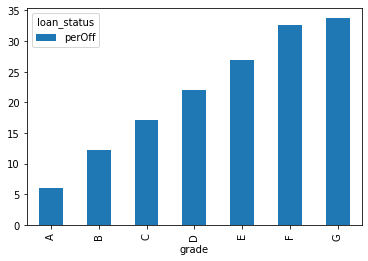

In [89]:
plotrisk.plot(kind="bar")
plt.show()

In [90]:
#important 
#The percentage of chargeoff increases with risk

In [91]:
#years in employment



In [92]:
df1.dtypes

id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [93]:
df1.term.value_counts()

 36 months    29081
 60 months     9476
Name: term, dtype: int64

In [94]:
df1.term.isnull().sum()

0

In [95]:
dfempl=df1[['emp_length','term']]
resempl=pd.pivot_table(data=dfempl,index=['emp_length'],columns =['term'],aggfunc=len)


In [96]:
resempl.head()

term,36 months,60 months
emp_length,,
0,809,224
1 year,2582,585
10+ years,5832,2647
2 years,3413,877
3 years,3092,919


<AxesSubplot:xlabel='emp_length'>

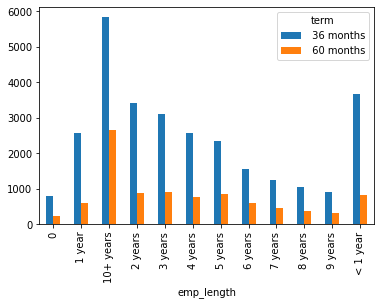

In [97]:
resempl.plot(kind="bar")

In [98]:
#important
#short term loans are mostly requested among all employee groups

In [99]:
dfemplgrade=df1[['grade','term']]
resemplg=pd.pivot_table(data=dfemplgrade,index=['grade'],columns =['term'],aggfunc=len)
resemplg.head()

term,36 months,60 months
grade,,
A,9643,394
B,9328,2343
C,5744,2083
D,3231,1853
E,868,1795


<AxesSubplot:xlabel='grade'>

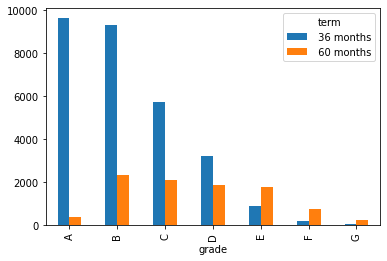

In [100]:
resemplg.plot(kind="bar")

In [101]:
#important
#Short term loans are mostly preferred over long term with people with good credit score.

In [102]:
plt.show()

In [103]:
dfemplstat=df1[['emp_length','loan_status']]
#func = lambda x: 100*x.count()/dfemplstat.shape[0]
resemplstat=pd.pivot_table(data=dfemplstat,index=['emp_length'],columns =['loan_status'],aggfunc=len)


In [104]:
resemplstat.head()


loan_status,Charged Off,Fully Paid
emp_length,,
0,228,805
1 year,456,2711
10+ years,1331,7148
2 years,566,3724
3 years,555,3456


<AxesSubplot:xlabel='emp_length'>

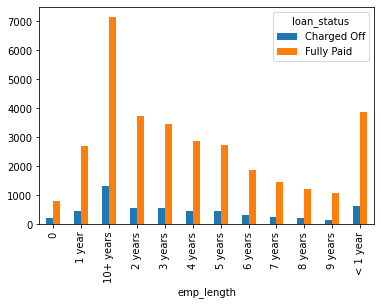

In [105]:
resemplstat.plot(kind='bar')

In [106]:
resemplstat['Total']=resemplstat['Charged Off']+resemplstat['Fully Paid']
resemplstat['perOff']=resemplstat['Charged Off']/resemplstat['Total']*100
resemplstat.head()

loan_status,Charged Off,Fully Paid,Total,perOff
emp_length,,,,
0,228,805,1033,22.071636
1 year,456,2711,3167,14.398484
10+ years,1331,7148,8479,15.697606
2 years,566,3724,4290,13.193473
3 years,555,3456,4011,13.836948


In [107]:
#important
#People with O employeement length have more percentage of chargeoff.

<AxesSubplot:xlabel='emp_length'>

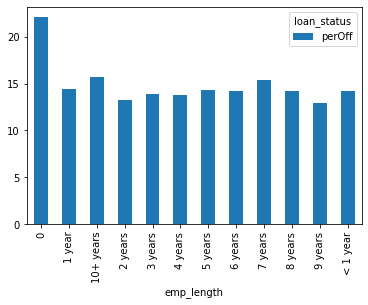

In [108]:
resemplstatplt=resemplstat[['perOff']]
resemplstatplt.plot(kind="bar")


In [109]:
#dti analysis
#A debt-to-income ratio (DTI) is a personal finance measure that compares the amount of debt you have to your overall income. Lenders, including issuers of mortgages, use it as a way to measure your ability to manage the payments you make each month and repay the money you have borrowed.
#Measuring dti against loan status
df1.dti.value_counts()

0.00     177
12.00     46
18.00     45
13.20     39
19.20     39
        ... 
28.26      1
28.95      1
25.77      1
27.20      1
25.43      1
Name: dti, Length: 2853, dtype: int64

In [110]:
df1.dti.isnull().sum()

0

In [111]:
df1['dtiRange']=pd.qcut(df1.dti,[0,0.33,0.66,1],["L","M","H"])
df1[['dti','dtiRange']]

,dti,dtiRange
0,27.65,H
1,1.00,L
2,8.72,L
3,20.00,H
5,11.20,M
...,...,...
39712,11.33,M
39713,6.40,L
39714,2.30,L
39715,3.72,L


In [112]:
dfdtRange=df1[['loan_status','dtiRange']]
dfdtRange.head()

,loan_status,dtiRange
0,Fully Paid,H
1,Charged Off,L
2,Fully Paid,L
3,Fully Paid,H
5,Fully Paid,M


In [113]:
resdti=pd.pivot_table(data=dfdtRange,index=['dtiRange'],columns =['loan_status'],aggfunc=len)
resdti.head()

loan_status,Charged Off,Fully Paid
dtiRange,,
L,1612,11126
M,1852,10868
H,2162,10937


<AxesSubplot:xlabel='dtiRange'>

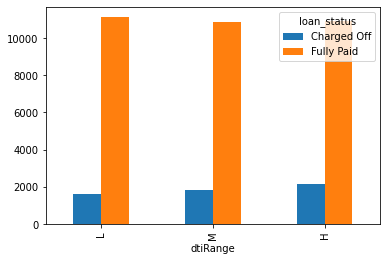

In [114]:
resdti.plot(kind="bar")

<AxesSubplot:xlabel='dtiRange'>

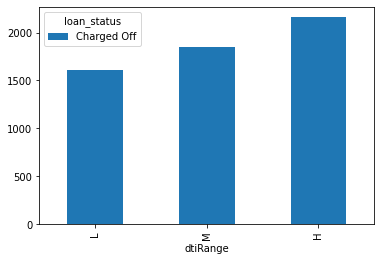

In [115]:
resdtplt = resdti[['Charged Off']]
resdtplt.plot(kind='bar')

In [116]:
#important
#dtiRange high will make higher chargeOff

In [117]:
#implementing with cut

In [118]:
#checking qcut and cut
df1['dtibitRange'] =pd.cut(x=df1['dti'], bins=(0,10,30,45))
df1[['dti','dtiRange','dtibitRange']]

,dti,dtiRange,dtibitRange
0,27.65,H,"(10, 30]"
1,1.00,L,"(0, 10]"
2,8.72,L,"(0, 10]"
3,20.00,H,"(10, 30]"
5,11.20,M,"(10, 30]"
...,...,...,...
39712,11.33,M,"(10, 30]"
39713,6.40,L,"(0, 10]"
39714,2.30,L,"(0, 10]"
39715,3.72,L,"(0, 10]"


In [119]:
dfdtRange1=df1[['loan_status','dtibitRange']]
dfdtRange1.head()

,loan_status,dtibitRange
0,Fully Paid,"(10, 30]"
1,Charged Off,"(0, 10]"
2,Fully Paid,"(0, 10]"
3,Fully Paid,"(10, 30]"
5,Fully Paid,"(10, 30]"


In [120]:
dfdtRange1.dtibitRange.value_counts()

(10, 30]    25641
(0, 10]     12739
(30, 45]        0
Name: dtibitRange, dtype: int64

In [121]:
resdti1=pd.pivot_table(data=dfdtRange1,index=['dtibitRange'],columns =['loan_status'],aggfunc=len)
resdti1.head()

loan_status,Charged Off,Fully Paid
dtibitRange,,
"(0, 10]",1602,11137
"(10, 30]",3995,21646


<AxesSubplot:xlabel='dtibitRange'>

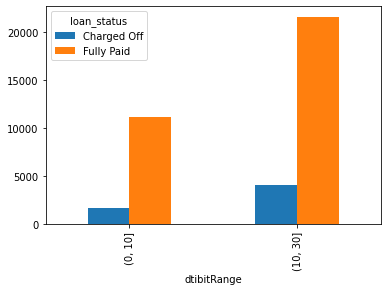

In [122]:
resdti1.plot(kind="bar")

<AxesSubplot:xlabel='dtibitRange'>

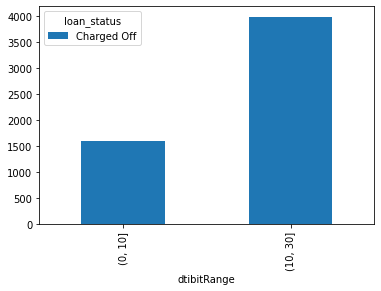

In [123]:
resdtplt1 = resdti1[['Charged Off']]
resdtplt1.plot(kind='bar')

In [124]:
#important
#Chargeoffs are higher in high dti range

In [125]:
#important 
#Checking whether int_rate hinders payment of lowincome group for educational purpose loans
dfLowIncome=df1[['incomeRange','loan_status','term','int_rate','grade','purpose']]
dfLowIncome.head()

,incomeRange,loan_status,term,int_rate,grade,purpose
0,L,Fully Paid,36 months,10.65,B,credit_card
1,L,Charged Off,60 months,15.27,C,car
2,L,Fully Paid,36 months,15.96,C,small_business
3,M,Fully Paid,36 months,13.49,C,other
5,L,Fully Paid,36 months,7.90,A,wedding


In [126]:
dfLowIncome=dfLowIncome[dfLowIncome.incomeRange =='L']
dfLowIncome=dfLowIncome[dfLowIncome.purpose =='educational']
dfLowIncome.head()

,incomeRange,loan_status,term,int_rate,grade,purpose
25162,L,Fully Paid,60 months,18.67,F,educational
25328,L,Charged Off,36 months,13.23,C,educational
25415,L,Charged Off,36 months,13.23,C,educational
25591,L,Fully Paid,36 months,10.75,B,educational
26251,L,Fully Paid,36 months,7.51,A,educational


In [127]:
dfLowIncome.int_rate.value_counts()
dfLowIncome.dtypes

incomeRange    category
loan_status      object
term             object
int_rate        float64
grade            object
purpose          object
dtype: object

In [128]:
dfLowIncome['intRange']=pd.qcut(dfLowIncome.int_rate,[0,0.33,0.66,1],["L","M","H"])
dfLowIncome=dfLowIncome[['loan_status','term','intRange']]

In [129]:
resLincome=pd.pivot_table(data=dfLowIncome,index=["loan_status","term"],columns =["intRange"],aggfunc=len)
resLincome.head()

intRange                   L     M     H
loan_status term                        
Charged Off  36 months   7.0  11.0  12.0
             60 months   1.0   NaN   4.0
Fully Paid   36 months  51.0  47.0  42.0
             60 months   1.0   1.0   4.0

In [130]:
resLincome['Total']=resLincome['L']+resLincome['M']+resLincome['H']
resLincome['perL']=resLincome['L']/resLincome['Total']*100
resLincome['perM']=resLincome['M']/resLincome['Total']*100
resLincome['perH']=resLincome['H']/resLincome['Total']*100
resLincome.head()

intRange                   L     M     H  Total       perL       perM  \
loan_status term                                                        
Charged Off  36 months   7.0  11.0  12.0   30.0  23.333333  36.666667   
             60 months   1.0   NaN   4.0    NaN        NaN        NaN   
Fully Paid   36 months  51.0  47.0  42.0  140.0  36.428571  33.571429   
             60 months   1.0   1.0   4.0    6.0  16.666667  16.666667   

intRange                     perH  
loan_status term                   
Charged Off  36 months  40.000000  
             60 months        NaN  
Fully Paid   36 months  30.000000  
             60 months  66.666667

In [131]:
resIncPer=resLincome[['perL','perM','perH']]
#For low income group, the chargeoff will be higher in case of longterm

In [132]:
resIncPer.head()

intRange                     perL       perM       perH
loan_status term                                       
Charged Off  36 months  23.333333  36.666667  40.000000
             60 months        NaN        NaN        NaN
Fully Paid   36 months  36.428571  33.571429  30.000000
             60 months  16.666667  16.666667  66.666667

<AxesSubplot:xlabel='loan_status,term'>

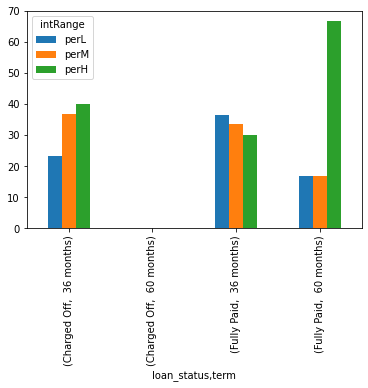

In [133]:
resIncPer.plot(kind="bar")

In [134]:
#important
#For education loans chargeoff occurs when interest rate is high and term is short in low income group
#If the term is long, high interest loans are also getting paid


In [135]:
df1.home_ownership.isnull().sum()

0

In [136]:
df1.home_ownership.value_counts()

RENT        18475
MORTGAGE    17007
OWN          2974
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

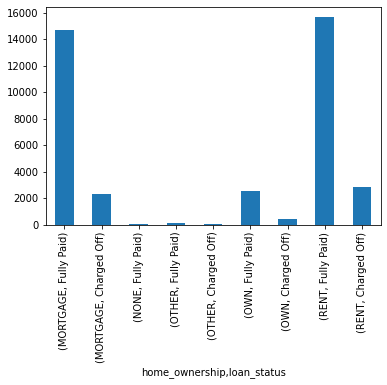

In [137]:
dfhstatus=df1.groupby(['home_ownership'])['loan_status'].value_counts().plot.bar()

In [138]:
dfhstaus=df1[['home_ownership','loan_status']]
reshstatus=pd.pivot_table(data=dfhstaus,index=['home_ownership'],columns =['loan_status'],aggfunc=len)
reshstatus.head()

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,2326.0,14681.0
NONE,NaN,3.0
OTHER,18.0,80.0
OWN,443.0,2531.0
RENT,2839.0,15636.0


<AxesSubplot:xlabel='home_ownership'>

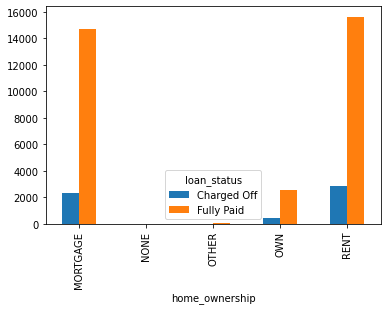

In [139]:
reshstatus.plot(kind="bar")

In [140]:
df1.dtypes


id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [141]:
df1.verification_status.value_counts()

Not Verified       16685
Verified           12202
Source Verified     9670
Name: verification_status, dtype: int64

In [142]:
dfverstat=df1[['verification_status','loan_status']]
resvstatus=pd.pivot_table(data=dfverstat,index=['verification_status'],columns =['loan_status'],aggfunc=len)
resvstatus.head()

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,2142,14543
Source Verified,1434,8236
Verified,2050,10152


<AxesSubplot:xlabel='verification_status'>

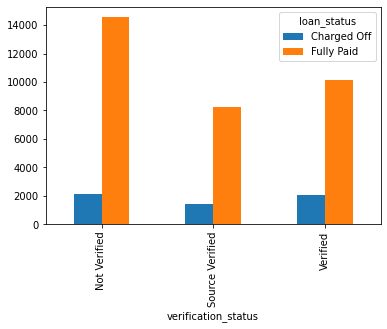

In [143]:
resvstatus.plot(kind="bar")

In [144]:
##Univariate Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

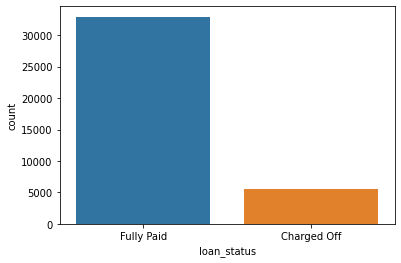

In [145]:
#Loan_Status
sns.countplot(x="loan_status",data=df1)

In [146]:
#The number of fully paid loans is much higher than Chargedoff


<AxesSubplot:xlabel='term', ylabel='count'>

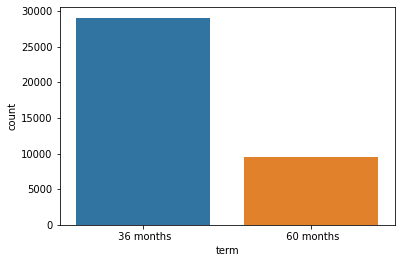

In [147]:
#term
sns.countplot(x="term",data=df1)

In [148]:
#Most of the loans are short term

<AxesSubplot:>

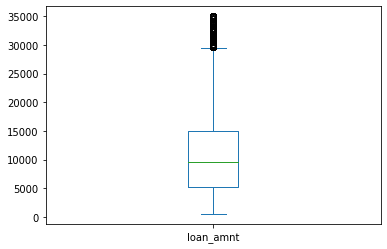

In [149]:
df1.loan_amnt.plot.box()

In [150]:
#Loan_amnt have a wide range of values max being 35000,min 500.75% of value lies less than equal to 15000
df1.loan_amnt.describe()

count    38557.000000
mean     11046.260082
std       7347.737999
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [151]:
 df1.grade.describe()

count     38557
unique        7
top           B
freq      11671
Name: grade, dtype: object

<AxesSubplot:xlabel='grade', ylabel='count'>

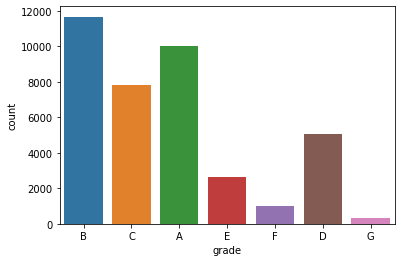

In [152]:
#grade
sns.countplot(x="grade",data=df1)

In [153]:
#People in high risk group finds it difficult to get loans


<AxesSubplot:xlabel='count', ylabel='emp_length'>

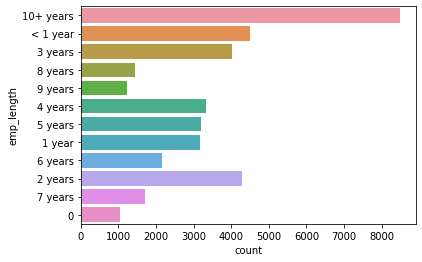

In [154]:
sns.countplot(y="emp_length",data=df1)

In [155]:
#People with experience of 10 years and more gets more loans

<AxesSubplot:xlabel='incomeRange', ylabel='count'>

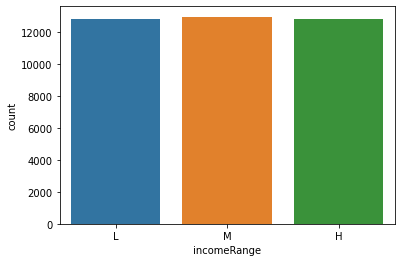

In [156]:
sns.countplot(x="incomeRange",data=df1)

In [158]:
dfIncLoanstatus=df1[['incomeRange','loan_status']]
resIncLoanstatus=pd.pivot_table(data=dfIncLoanstatus,index=['incomeRange'],columns =['loan_status'],aggfunc=len)
resIncLoanstatus.head()

loan_status,Charged Off,Fully Paid
incomeRange,,
L,2223,10583
M,1905,11054
H,1498,11294


<AxesSubplot:xlabel='incomeRange'>

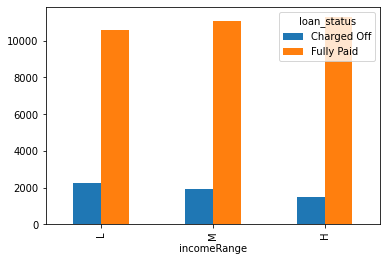

In [159]:
resIncLoanstatus.plot(kind="bar")